In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
file_path = "C:/Users/ATAISH NEHRA/Downloads/merged_natural_disaster_dataset_1992_2020.csv"  
data = pd.read_csv(file_path)

In [3]:
data

,Country,Year,Temperature,Drought,Extreme temperature,Flood,Landslide,Storm,Total Disasters,Wildfire,...,Sparsely natural vegetated areas: Climate neutral,Terrestrial barren land: Climate neutral,Tree-covered areas: Climate regulating,Woody crops: Climate regulating,Carbon stocks in forests,Forest area,Index of carbon stocks in forests,Index of forest extent,Land area,Share of forest area
0,Afghanistan,1992,-0.294,0,0,2,0,0,2,0,...,4275.25530,24963.00090,1263.70310,87.433900,2120.071125,1208.440,100.000000,100.000000,65223.00,1.852782
1,Afghanistan,1993,0.220,0,0,0,2,1,3,0,...,4275.22430,24963.00090,1263.78800,81.110900,2160.349425,1208.440,101.072442,100.000000,65223.00,1.852782
2,Afghanistan,1994,0.430,0,0,0,0,0,0,0,...,4275.22430,24963.00090,1263.86200,82.360600,2200.627750,1208.440,102.144893,100.000000,65223.00,1.852782
3,Afghanistan,1995,0.359,0,0,2,1,0,3,0,...,4227.85360,25088.57510,1241.12490,75.512400,2240.906000,1208.440,103.217332,100.000000,65223.00,1.852782
4,Afghanistan,1996,-0.116,0,0,1,0,0,1,0,...,4220.79300,25108.35560,1240.81720,79.485700,2281.184300,1208.440,104.289774,100.000000,65223.00,1.852782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,World,2016,1.660,14,12,159,13,86,10,10,...,21094.61677,15707.56873,99041.46252,4687.315517,294750.681000,4080599.782,99.259755,96.679343,13026958.88,31.324270
895,World,2017,1.429,12,10,127,25,126,15,15,...,21073.52536,15697.08307,99039.17884,4616.848180,294474.016900,4073753.425,99.166586,96.517136,13026230.26,31.273464
896,World,2018,1.290,17,27,127,12,94,10,10,...,20898.69670,15679.27079,98704.85685,4636.315717,294450.303600,4068919.514,99.158601,96.402609,13026300.91,31.236186
897,World,2019,1.444,15,21,195,25,91,14,14,...,20888.64099,15658.86106,98385.52924,4662.655917,294295.808000,4063839.320,99.106573,96.282247,13026294.74,31.197201


In [4]:
data.columns.values.tolist()

['Country',
 'Year',
 'Temperature',
 'Drought',
 'Extreme temperature',
 'Flood',
 'Landslide',
 'Storm',
 'Total Disasters',
 'Wildfire',
 'Sea level Value',
 'Artificial surfaces (including urban and associated areas): Climate altering',
 'Cover Index: Climate altering',
 'Grassland: Climate regulating',
 'Herbaceous crops: Climate altering',
 'Inland water bodies: Climate regulating',
 'Mangroves: Climate regulating',
 'Permanent snow and glaciers: Climate regulating',
 'Shrub-covered areas: Climate regulating',
 'Shrubs and/or herbaceous vegetation, aquatic or regularly flooded: Climate regulating',
 'Sparsely natural vegetated areas: Climate neutral',
 'Terrestrial barren land: Climate neutral',
 'Tree-covered areas: Climate regulating',
 'Woody crops: Climate regulating',
 'Carbon stocks in forests',
 'Forest area',
 'Index of carbon stocks in forests',
 'Index of forest extent',
 'Land area',
 'Share of forest area']

In [ ]:

# Assuming 'Country', 'Year', and other feature columns are in the dataset
feature_columns = ['Temperature', 'Drought', 'Extreme temperature', 'Flood', 'Landslide', 'Storm', 'Wildfire', 'Forest area', 'Carbon stocks in forests']
target_column = 'Total Disasters'

# Scale the features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(data[feature_columns])

# Scale the target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(data[[target_column]])

In [5]:
# Assuming 'Country', 'Year', and other feature columns are in the dataset
feature_columns = ['Temperature', 'Sea level Value', 'Carbon stocks in forests', 'Sea level Value',
 'Artificial surfaces (including urban and associated areas): Climate altering',
 'Cover Index: Climate altering',
 'Grassland: Climate regulating',
 'Herbaceous crops: Climate altering',
 'Inland water bodies: Climate regulating',
 'Mangroves: Climate regulating',
 'Permanent snow and glaciers: Climate regulating',
 'Shrub-covered areas: Climate regulating',
 'Shrubs and/or herbaceous vegetation, aquatic or regularly flooded: Climate regulating',
 'Sparsely natural vegetated areas: Climate neutral',
 'Terrestrial barren land: Climate neutral',
 'Tree-covered areas: Climate regulating',
 'Woody crops: Climate regulating']
target_column = 'Total Disasters'

# Scale the features
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(data[feature_columns])

# Scale the target
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(data[[target_column]])

In [6]:
# Function to create sequences by country
def create_sequences_by_country(X, y, n_steps, data):
    Xs, ys = [], []
    countries = data['Country'].unique()
    for country in countries:
        country_indices = data[data['Country'] == country].index
        country_data_X = X[country_indices]
        country_data_y = y[country_indices]
        for i in range(len(country_data_X) - n_steps):
            Xs.append(country_data_X[i:(i + n_steps)])
            ys.append(country_data_y[i + n_steps])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

n_steps = 3  # Using 3 years of data to predict the next year
X_seq, y_seq = create_sequences_by_country(X_scaled, y_scaled, n_steps, data)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.3, random_state=42)

In [7]:
# Define LSTM model
model = Sequential([
    LSTM(100, activation='relu', input_shape=(n_steps, len(feature_columns))),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

In [25]:
# Train the model
history = model.fit(X_train, y_train, epochs=300, validation_split=0.3, verbose=2)

Epoch 1/300
13/13 - 0s - loss: 0.0014 - val_loss: 0.0178 - 74ms/epoch - 6ms/step
Epoch 2/300
13/13 - 0s - loss: 0.0014 - val_loss: 0.0184 - 57ms/epoch - 4ms/step
Epoch 3/300
13/13 - 0s - loss: 0.0015 - val_loss: 0.0183 - 53ms/epoch - 4ms/step
Epoch 4/300
13/13 - 0s - loss: 0.0013 - val_loss: 0.0170 - 51ms/epoch - 4ms/step
Epoch 5/300
13/13 - 0s - loss: 0.0015 - val_loss: 0.0188 - 53ms/epoch - 4ms/step
Epoch 6/300
13/13 - 0s - loss: 0.0016 - val_loss: 0.0172 - 58ms/epoch - 4ms/step
Epoch 7/300
13/13 - 0s - loss: 0.0013 - val_loss: 0.0169 - 52ms/epoch - 4ms/step
Epoch 8/300
13/13 - 0s - loss: 0.0014 - val_loss: 0.0179 - 44ms/epoch - 3ms/step
Epoch 9/300
13/13 - 0s - loss: 0.0015 - val_loss: 0.0184 - 46ms/epoch - 4ms/step
Epoch 10/300
13/13 - 0s - loss: 0.0014 - val_loss: 0.0172 - 45ms/epoch - 3ms/step
Epoch 11/300
13/13 - 0s - loss: 0.0016 - val_loss: 0.0182 - 44ms/epoch - 3ms/step
Epoch 12/300
13/13 - 0s - loss: 0.0017 - val_loss: 0.0171 - 47ms/epoch - 4ms/step
Epoch 13/300
13/13 - 0s -

In [26]:
# Predictions
predictions_scaled = model.predict(X_test)

In [27]:
# Inverse transform predictions
predictions = scaler_y.inverse_transform(predictions_scaled)

# Compare predictions with actual values (optional)
y_test_actual = scaler_y.inverse_transform(y_test)
comparison = pd.DataFrame({'Actual': y_test_actual.flatten(), 'Predicted': predictions.flatten()})
print(comparison.head())

   Actual  Predicted
0     4.0   4.746358
1     6.0   7.667839
2     7.0   5.306402
3     3.0   2.278131
4     3.0   3.953605


In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_actual, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 12.202341780649487
Root Mean Squared Error: 3.493185048154404
Mean Absolute Error: 2.543120525253952


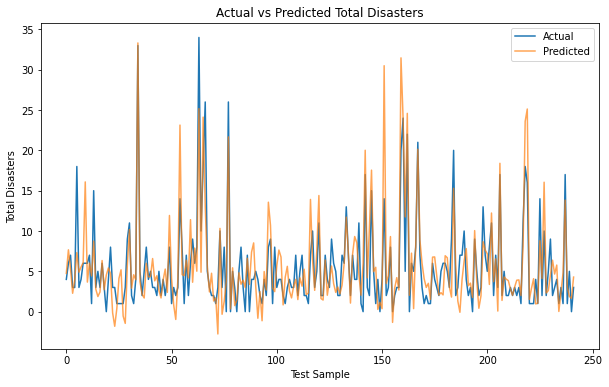

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual')
plt.plot(predictions, label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Total Disasters')
plt.xlabel('Test Sample')
plt.ylabel('Total Disasters')
plt.legend()
plt.show()

In [30]:
def predict_disaster_for_country_year(data, model, scaler_X, scaler_y, feature_columns, country, input_year):
    # Convert input_year from string to int
    input_year = int(input_year)
    
    # Filter data for the selected country and up to the selected year
    country_data = data[(data['Country'] == country) & (data['Year'] >= input_year - 2) & (data['Year'] <= input_year)]
    
    if len(country_data) < 3:
        print(f"Not enough data for {country} leading up to {input_year}.")
        return
    
    # Convert to DataFrame to maintain feature names
    features_df = country_data[feature_columns]
    features_scaled = scaler_X.transform(features_df)  # Scale features
    features_reshaped = features_scaled.reshape(1, 3, len(feature_columns))  # Reshape for the model
    
    # Make prediction
    predicted_scaled = model.predict(features_reshaped)
    predicted = scaler_y.inverse_transform(predicted_scaled)[0][0]  # Inverse transform prediction
    
    # Get actual value for the year
    actual_value = data[(data['Country'] == country) & (data['Year'] == input_year)][target_column].values[0] if len(data[(data['Country'] == country) & (data['Year'] == input_year)][target_column]) > 0 else None
    
    if actual_value is not None:
        # Calculate accuracy percentage
        accuracy = max(0, 1 - abs(predicted - actual_value) / actual_value) * 100
        
        print(f"Country: {country}, Year: {input_year}")
        print(f"Actual 'Total Disasters': {actual_value}")
        print(f"Predicted 'Total Disasters': {predicted:.2f}")
        print(f"Accuracy: {accuracy:.2f}%")
    else:
        print(f"No actual data available for {country} in {input_year}.")
        print(f"Predicted 'Total Disasters': {predicted:.2f}")

In [31]:
# Example usage
user_country = input("Enter country name: ")
user_year = input("Enter a year between 2017 and 2020: ")

predict_disaster_for_country_year(data, model, scaler_X, scaler_y, feature_columns, user_country, user_year)

Enter country name:  India
Enter a year between 2017 and 2020:  2019


Country: India, Year: 2019
Actual 'Total Disasters': 12
Predicted 'Total Disasters': 14.40
Accuracy: 80.01%


In [36]:
# Example usage
user_country = input("Enter country name: ")
user_year = input("Enter a year between 2017 and 2020: ")

predict_disaster_for_country_year(data, model, scaler_X, scaler_y, feature_columns, user_country, user_year)

Enter country name:  India
Enter a year between 2017 and 2020:  2020


Country: India, Year: 2020
Actual 'Total Disasters': 11
Predicted 'Total Disasters': 10.66
Accuracy: 96.94%


In [24]:

# Example usage
user_country = input("Enter country name: ")
user_year = input("Enter a year between 2017 
and 2020: ")

predict_disaster_for_country_year(data, model, scaler_X, scaler_y, feature_columns, user_country, user_year)

Enter country name:  Brazil
Enter a year between 2017 and 2020:  2019


Country: Brazil, Year: 2019
Actual 'Total Disasters': 8
Predicted 'Total Disasters': 6.84
Accuracy: 85.52%
